### Validez Constructo

Se refiere al grado en que una medición se relaciona consistentemente, con otras mediciones de acuerdo con hipótesis derivadas teóricamente y que conciernen a los constructos que estan siendo medidos. 

Analisis factorial

In [ ]:
pip install pandas numpy matplotlib factor_analyzer


Prueba de Esfericidad de Bartlett
Chi-cuadrado: 7.017096185996783 p-valor: 0.723829988885786
Medida de Adecuación Muestral de Kaiser (KMO): 0.5185545204953692


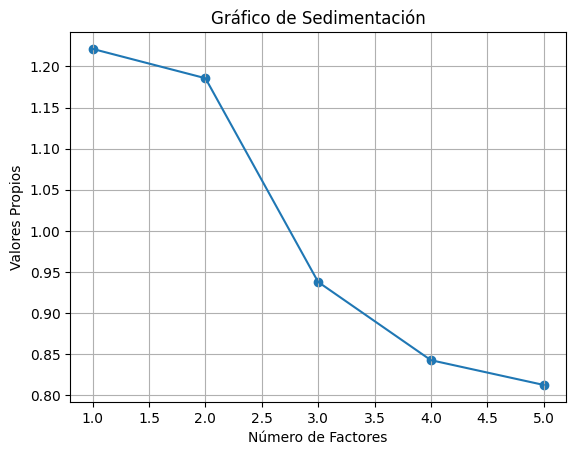

In [2]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel('data/Respuestas_Encuesta_Aprendizaje_Online.xlsx')

# Asegurarse de que todos los datos son numéricos
df = df.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Realizar el análisis de la matriz de correlaciones para determinar la adecuación de los datos
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Prueba de Esfericidad de Bartlett")
print("Chi-cuadrado:", chi_square_value, "p-valor:", p_value)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print("Medida de Adecuación Muestral de Kaiser (KMO):", kmo_model)

# Realizar el análisis factorial exploratorio para estimar el número de factores
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

# Crear el gráfico de sedimentación
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Gráfico de Sedimentación')
plt.xlabel('Número de Factores')
plt.ylabel('Valores Propios')
plt.grid()
plt.show()

# El gráfico ayuda a determinar el número de factores a retener
# Aquí, se asumirá que decides retener un número de factores basado en el gráfico

# fa = FactorAnalyzer(n_factors=numero_de_factores_a_retener, rotation='varimax')
# fa.fit(df)
# print(fa.loadings_)


### Prueba de Esfericidad de Bartlett

Esta prueba verifica si la matriz de correlaciones es una matriz de identidad, lo que implicaría que las variables son inadecuadas para el análisis factorial. Un valor de chi-cuadrado bajo y un p-valor alto (como el p-valor de 0.723 que se muestra) sugieren que las correlaciones entre ítems no son significativamente diferentes de cero y que el análisis factorial puede no ser adecuado. Sin embargo, esto depende del contexto y del nivel de significancia aceptado (usualmente 0.05).

### Medida de Adecuación Muestral de Kaiser (KMO)

El KMO mide la idoneidad de los datos para el análisis factorial. Varía entre 0 y 1, y un valor de 0.5 o más bajo, como el 0.518 mostrado aquí, se considera inaceptable. En general, se busca un valor de KMO mayor que 0.6, con valores de 0.7 o más indicando que un análisis factorial puede ser útil.

### Gráfico de Sedimentación

También conocido como gráfico de Scree, muestra los valores propios (eigenvalues) en el eje vertical contra el número de factores en el eje horizontal. Los valores propios representan la cantidad de varianza explicada por cada factor latente. En la práctica, buscas un punto donde la curva se aplana y no hay ganancia significativa al aumentar el número de factores, conocido como el "codo". En tu gráfico, esto parece ocurrir después del segundo factor, lo que sugiere que dos factores son suficientes para capturar la mayor parte de la variabilidad en los datos.
Interpretando conjuntamente, estos resultados sugieren que podrías reconsiderar si el análisis factorial es el método adecuado para tus datos debido a la prueba de Bartlett y el bajo valor de KMO. Si decides proceder, basándote en el gráfico de Scree, podrías considerar usar dos factores en tu modelo.

Prueba de Esfericidad de Bartlett
Chi-cuadrado: 22753.291359157996 p-valor: 0.0
Medida de Adecuación Muestral de Kaiser (KMO): 0.9691357551664515


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


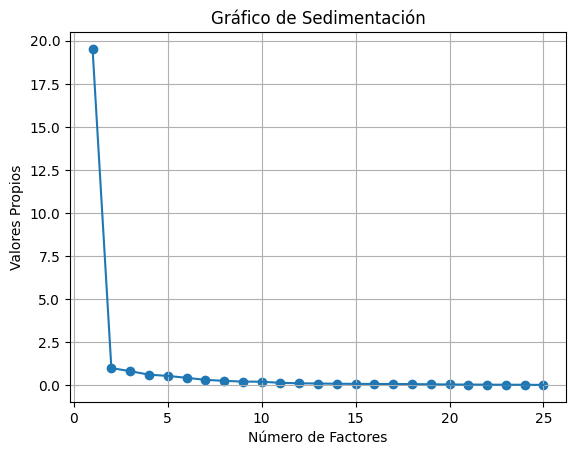

In [3]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel('data/Respuestas_Simuladas_Adecuadas_Analisis_Factorial.xlsx')

# Asegurarse de que todos los datos son numéricos
df = df.apply(pd.to_numeric, errors='coerce')

# Eliminar filas con valores faltantes
df.dropna(inplace=True)

# Realizar el análisis de la matriz de correlaciones para determinar la adecuación de los datos
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df)
print("Prueba de Esfericidad de Bartlett")
print("Chi-cuadrado:", chi_square_value, "p-valor:", p_value)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df)
print("Medida de Adecuación Muestral de Kaiser (KMO):", kmo_model)

# Realizar el análisis factorial exploratorio para estimar el número de factores
fa = FactorAnalyzer(rotation=None)
fa.fit(df)

# Crear el gráfico de sedimentación
ev, v = fa.get_eigenvalues()
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Gráfico de Sedimentación')
plt.xlabel('Número de Factores')
plt.ylabel('Valores Propios')
plt.grid()
plt.show()

# El gráfico ayuda a determinar el número de factores a retener
# Aquí, se asumirá que decides retener un número de factores basado en el gráfico

# fa = FactorAnalyzer(n_factors=numero_de_factores_a_retener, rotation='varimax')
# fa.fit(df)
# print(fa.loadings_)

### Prueba de Esfericidad de Bartlett

Esta prueba tiene un chi-cuadrado muy alto (22753.29) y un p-valor de 0.0, lo que indica que rechazamos la hipótesis nula de que la matriz de correlaciones es igual a la matriz de identidad. En otras palabras, hay correlaciones suficientes entre las variables para proceder con el análisis factorial.
### Medida de Adecuación Muestral de Kaiser (KMO)

El valor de KMO es 0.969, que es extremadamente alto. Un KMO cerca de 1 sugiere que la correlación entre las variables es muy alta y que el análisis factorial es adecuado. Este es un indicador muy bueno de que tu análisis factorial es probable que sea significativo y útil.
### Gráfico de Sedimentación

En el gráfico de sedimentación o Scree plot, se observa una caída pronunciada después del primer factor, lo que sugiere que un solo factor podría ser suficiente para explicar la mayoría de la varianza en tus datos. La curva se aplana después del primer factor, lo que típicamente indicaría que no hay necesidad de extraer más factores.
Este resultado, en conjunto con la prueba de esfericidad y el valor de KMO, sugiere que el conjunto de datos es muy adecuado para un análisis factorial y que probablemente no necesitas más de un factor para explicar la varianza observada en tus datos.

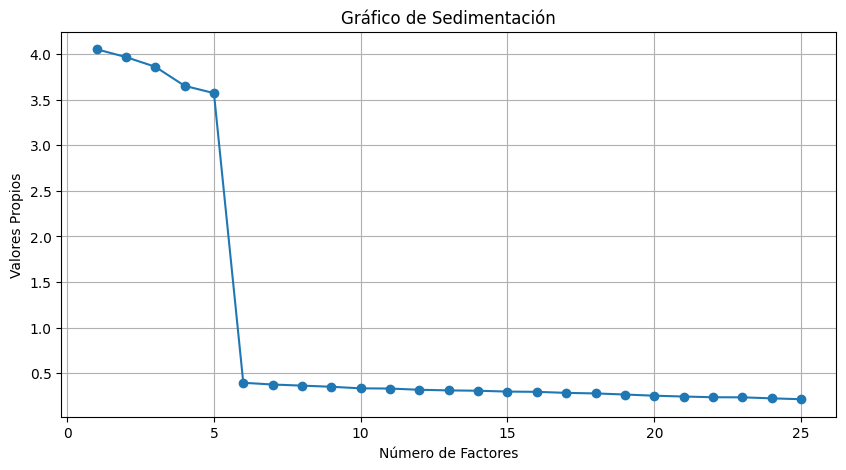

In [5]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Configurar la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Generar datos simulados
num_factores = 5
num_variables = 25  # Asumiendo 5 variables por factor
num_respuestas = 1000

# Simular cargas factoriales con alta carga en su factor respectivo y baja en otros
cargas = np.zeros((num_variables, num_factores))
for i in range(num_factores):
    cargas[i*5:(i+1)*5, i] = np.random.uniform(0.7, 0.9, size=5)

# Simular los datos
datos = np.dot(np.random.normal(size=(num_respuestas, num_factores)), cargas.T)
datos += np.random.normal(scale=0.5, size=datos.shape)  # Añadir algo de ruido

# Convertir a DataFrame
df = pd.DataFrame(datos, columns=[f'Var{i+1}' for i in range(num_variables)])

# Análisis factorial exploratorio
fa = FactorAnalyzer(n_factors=num_variables, rotation=None)
fa.fit(df)

# Obtener los valores propios para el gráfico de sedimentación
valores_propios, varianza = fa.get_eigenvalues()

# Gráfico de sedimentación (Scree Plot)
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_variables+1), valores_propios, 'o-')
plt.title('Gráfico de Sedimentación')
plt.xlabel('Número de Factores')
plt.ylabel('Valores Propios')
plt.grid(True)
plt.show()


Este gráfico de sedimentación te está indicando la cantidad de varianza que cada factor adicional explicaría en tus datos. Aquí está lo que muestra y cómo interpretarlo:

Valores propios (eigenvalues): En el eje vertical, cada punto representa el valor propio asociado con cada factor potencial (en el eje horizontal). Los valores propios indican cuánta varianza en los datos es explicada por cada factor.
Codo o punto de inflexión: El punto donde la curva comienza a aplanarse (el "codo") es el que sugiere cuántos factores son significativos. En este caso, hay una caída dramática después del primer factor, seguida de un aplanamiento después del quinto factor.
Número de factores a retener: Basándote en el gráfico, parece que los primeros cinco factores son significativos. Después del quinto factor, los valores propios se acercan a 1 o caen por debajo, lo que indica que cada factor adicional contribuye poco a explicar la varianza adicional en los datos.
Por lo tanto, la interpretación del gráfico sugiere que podrías retener cinco factores para tu análisis factorial, lo cual está alineado con tus cinco dimensiones teóricas. Cualquier factor después del quinto agregaría poco valor en términos de explicar la variabilidad en tus datos, y por lo tanto puede no ser significativo para incluir en tu modelo.